In [2]:
import numpy as np 
import matplotlib.pyplot as plt

##### **Parameters:**

In [21]:
Ts = 1.0
fs = 1.0 / Ts
num_samples = 1000 

f = np.linspace(-fs/2, fs/2, num_samples)
omega = 2 * np.pi * f

# Filter order: 
N = 2

### **Moving Average: Common and Recursive**

**Commonly used:**

$$y[n] = \frac{1}{N}\sum_{k = 0}^{N-1} x[n-k]$$
$$H(z) = \frac{1}{N} \cdot \left(1 + z^{-1} + \cdots + z^{-(N-1)}\right)$$
$$H(e^{j\omega}) = \frac{1}{N} \cdot \left(1 + e^{-j\omega} + \cdots + e^{-j(N-1)\omega}\right) $$

**Recursive one:**
$$y[n] = \frac{N-1}{N}y[n - 1] + \frac{1}{N}x[n]$$
$$H(z) = \frac{1}{N} \cdot \frac{1}{1-\frac{N-1}{N}z^{-1}}$$
$$H(e^{j\omega}) = \frac{1}{N} \cdot \frac{1}{1-\frac{N-1}{N}e^{-j\omega}}$$


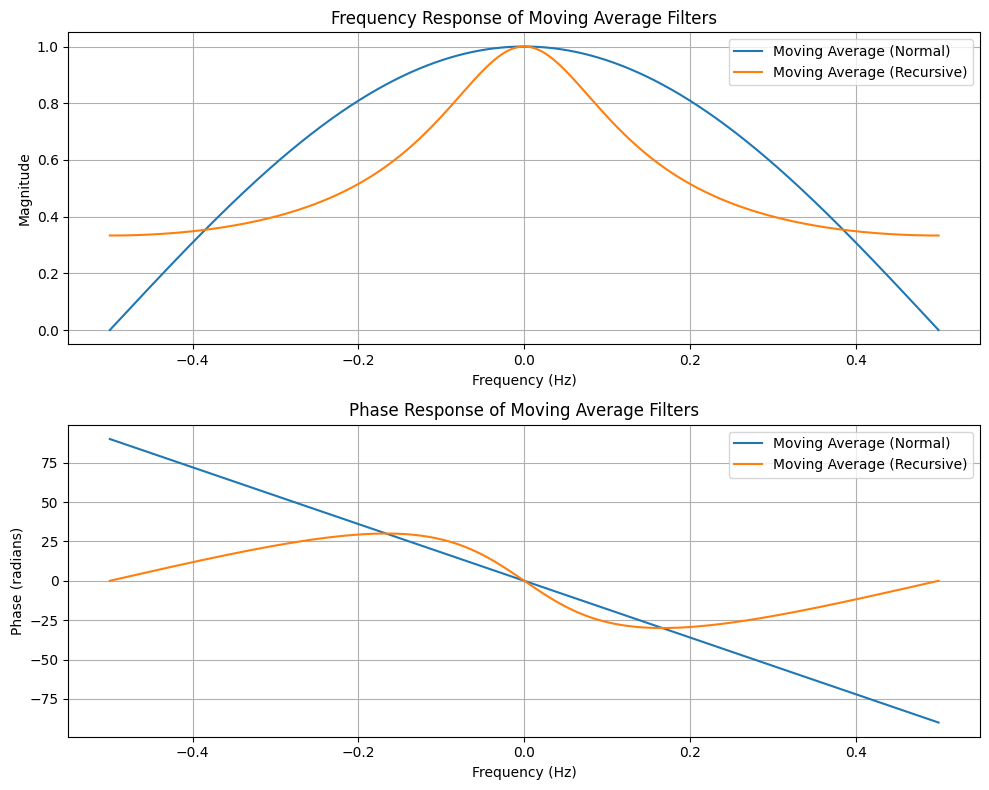

In [22]:
# Moving averagre normal: 
H1z = np.zeros(num_samples, dtype=complex)
for k in range(N): 
    H1z += np.exp(-1j * omega * k)
H1z /= N

# Recursive Moving Average:
H2z = (1/N) * (1 / (1 - (N-1)/N * np.exp(-1j * omega)))

# Plotting the frequency response
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(f, np.abs(H1z), label='Moving Average (Normal)')
ax[0].plot(f, np.abs(H2z), label='Moving Average (Recursive)')
ax[0].set_title('Frequency Response of Moving Average Filters')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
ax[0].legend()
ax[1].plot(f, np.unwrap(np.angle(H1z,deg=True),period=360), label='Moving Average (Normal)')
ax[1].plot(f, np.unwrap(np.angle(H2z,deg=True),period=360), label='Moving Average (Recursive)')
ax[1].set_title('Phase Response of Moving Average Filters')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Phase (radians)')
ax[1].grid()
ax[1].legend()
plt.tight_layout()
plt.show()